This notebook covers how to download the SpaceNet data, and how to get started viewing it with QGIS and Python.

## Install and Configure AWS CLI

You'll need the Amazon AWS command-line interface installed and configured before you can download the SpaceNet data from S3.  Follow the [installation instructions on the AWS website](http://docs.aws.amazon.com/cli/latest/userguide/installing.html).  Generally, `awscli` installs with pip, but you might need to debug your installation.

Once you have AWS CLI installed, you need to configure it with your AWS credentials.  This is pretty easy once you find your credentials, which is a little confusing. You can find your credentials in the [IAM console](https://console.aws.amazon.com/iam/home?#home) on AWS.  For more info, check [the instructions](http://docs.aws.amazon.com/cli/latest/userguide/cli-chap-getting-started.html).

Now that you have your `Access Key ID` and your `Secret Access Key`, you can configure AWS CLI.

At the terminal, run
```
aws configure
```

Then the prompt will ask you to enter your keys, so go ahead and do that.

## Download SpaceNet Data
Now that AWS CLI is configured, you're ready to download SpaceNet files. The files are in big tar files, and by big I mean YUGE. Paris is the smallest city, at only 5 GB.  You may want to consider storing these files on an external disk instead of using your main hard disk, or storing them on your own AWS instance.

Figuring out how to use AWS CLI is a little tricky, but you can skip all that nonsense by getting the pre-written AWS CLI commands for each city [here](https://spacenetchallenge.github.io/).  For example, to download the Paris images, we just run:

```
## Warning this file is 5 GB
aws s3api get-object --bucket spacenet-dataset --key AOI_3_Paris/AOI_3_Paris_Train.tar.gz --request-payer requester AOI_3_Paris_Train.tar.gz
```

Now the file will start downloading.  You will be billed by AWS for downloading this file, but it doesn't cost much.  I think it's just a couple of dollars to download all of the SpaceNet data.  Just don't do it more than once and you'll be fine.  It usually takes a couple of minutes to finish the download.  Once it's done, you can open the file and start exploring.

## Explore SpaceNet Data
Unpack the file using the tar command:
```
tar -xf AOI_3_Paris_Train.tar.gz
```

Now all of the files will be extracted in a directory called `/media/alan/storage/data/spacenet/AOI_3_Paris_Train`.  Inside that directory, you'll see 6 folders

```
$ls
geojson  MUL  MUL-PanSharpen  PAN  RGB-PanSharpen  summaryData
```

These directories tell you what's in them, but it's using satellite terminology so I'll explain them, but first I need to explain a few basic concepts in satellite imagery.

When a satellite takes an image, it uses a few different cameras to collect different kinds of imagery.  There is a greyscale camera that takes a high resolution image, and then some other cameras that measure color at lower resolution.  The cameras that detect color are not as precise as the grayscale cameras.  Even so, we get full resolution color images.  These are made by mapping the color onto the high-resolution grayscale image.  This involves complicated math stuff (or so I assume), but you and I don't have to worry about that because it has already been taken care of.  That's what [pan-sharpening](http://desktop.arcgis.com/en/arcmap/10.3/manage-data/raster-and-images/fundamentals-of-panchromatic-sharpening.htm) is.

Here's what's in each of the folders:
* geojson: GeoJSON is a variation of the JSON format desiged for storing geospatial vectors.  It's equivalent to the shapefile format, but easier to read.  This folder contains polygons that mark the shapes of buildings.
* `MUL`: This folder contains 8-band images at low resolution.  These 8 bands include the R, G, and B bands.  You probably don't want to use these, because you can just use MUL-Pansharpen, which is at full resolution.
* `MUL-PanSharpen`: The is 8-band images at full resolution.  It has been pan-sharpened for you already.  These are good images to use in training your model.
* `PAN`: This folder contains full-resolution grayscale images.
* `RGB-PanSharpen`: This folder contains RBG images at full resolution.  All the bands in these images are also in MUL-PanSharpen.  This folder is just there for convenience.  You could use these files for training your model if you're a naturally lazy and unambitious person :wink:
* `summaryData`: This folder contains a single csv file with all of the information in the geojson folder.  You can read it in python with one line: `gpd.read_csv('AOI_3_Paris_Train_Building_Solutions.csv')`

I told you that all of the `.tif` files in the image folder are images, but you might find that if you try to open them like normal images they just look like blank black boxes.  This is because they're not normal images, they're geo-referenced tiff files.  Normal software often doesn't know what to do with these.  To view them, you can either use QGIS or just open them in python.

Let's start with QGIS, because it's easier to get off the ground that way.

# View GeoTIFF Images with QGIS
## Install QGIS

### Mac
You can download QGIS from the [QGIS website](http://www.qgis.org/en/site/forusers/download.html) (more detailed instructions [here](http://drjill.net/install-qgis-on-a-mac-in-8-steps/))

You can also try installing it with homebrew (don't do both): http://usabilityetc.com/2016/06/how-to-install-qgis-with-homebrew/


### Ubuntu
If you're on Ubuntu, I reccomend installing it using the ubuntugis ppa. These commands will also install GDAL

```
sudo add-apt-repository ppa:ubuntugis/ppa
sudo apt-get update
sudo apt-get install libgdal-dev
sudo apt-get install gdal-bin
sudo apt-get install qgis
```

### Windows
You're on your own.


## Display an image in QGIS
Now launch QGIS.  Gotta love that design, eh?  QGIS has a fantastic, user-friendly, and intuitive interface, so this should be easy.  Just kidding.  Go to menu bar and click `Layer -> Add Layer -> Add Raster Layer`.  Now navigate to the `AOI_3_Paris_Train` folder and open `MUL-PanSharpen/MUL-PanSharpen_AOI_3_Paris_img100.tif`  I went down the list to image 100 because some of the images at the top of the list are cut off at weird angles.  Now you should see a city block in paris.  

![Screenshot showing the city block in QGIS](assets/Screenshot from 2017-05-15 10-27-53.png)

This image has 8 bands, but only 3 bands are being shown.  In the lower-left portion of the screen, you can see the name of the "layer" you're looking at.  QGIS can superimpose different layers on top of each other just like Photoshop or Illustrator.  If you want to explore some of the other color bands, double click on the layer name and then choose the "Style" tab on the side.  Now we can change the Red, Green, or Blue band in QGIS so it will show data from a different band.  This doesn't change the file, it just changes the way QGIS displays it.  It will make the image look weird.

![Screenshot showing weird color bands](assets/Screenshot from 2017-05-15 10-31-24.png)

Here I set the Red band to display Band 5, which had the effect of turning the image pink.

# View GeoTIFFs in Python
To load GeoTIFFs in python, you need special package to handle it.  I use a few, but I think rasterio is the easiest one to work with.  It's also the easiest one to install on a mac.  It should be as simple as this:
```
$pip install rasterio
```

If you're having trouble installing rasterio, try looking at the [installation instructions](https://mapbox.github.io/rasterio/installation.html).

## Load an image

Now that we have rasterio installed, we can use it to load a GeoTIFF.  I included an ex

In [1]:
import rasterio
src = rasterio.open('assets/MUL-PanSharpen_AOI_3_Paris_img100.tif')

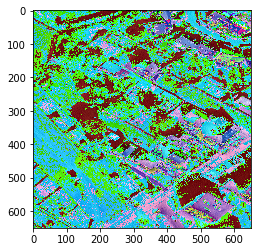

In [2]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# Load the RGB bands and reshape the image
img = src.read([5, 3, 2]).transpose([1,2,0])

# Plot it
plt.imshow(img)

`src.read([5, 3, 2])` tells rasterio to load the RGB bands from the 8-channel tiff image.  By default, the number of channels will come before width and height, so `transpose([1,2,0])` reorders the dimensions into the order that other python packages will deal with.  Check out [this website](http://www.geocarto.com.hk/edu/PJ-BCMBWV3G/main_BCW3.html) to understand why it was `[5, 3, 2]` and not `[1, 2, 3]`.

The image looks weird because its actually an 11-bit image stored in 16 bit integers.  You can try to figure out what that means, or you can just run the next cell which will make everything look better

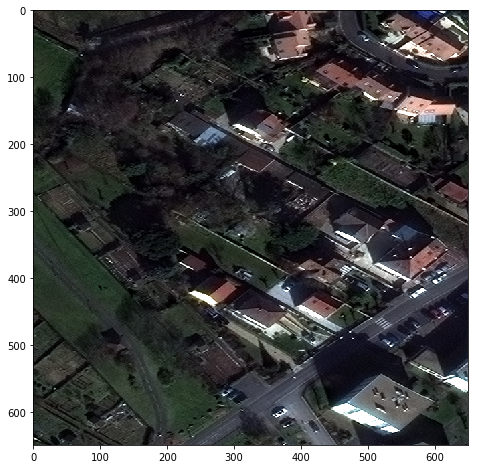

In [3]:
def scale_bands(img, lower_pct = 1, upper_pct = 99):
    """
    Rescale the bands of a multichannel image
    """
    # Loop through the image bands, rescaling each one
    img_scaled = np.zeros(img.shape, np.uint8)
    for i in range(img.shape[2]):
        band = img[:, :, i]
        lower, upper = np.percentile(band, [lower_pct, upper_pct])
        band = (band - lower) / (upper - lower) * 255
        img_scaled[:, :, i] = np.clip(band, 0, 255).astype(np.uint8)
    return img_scaled



# Plot the rescaled image
fig, ax = plt.subplots(figsize=(8,8))
ax.imshow(scale_bands(img))


`src` is an object representing the GeoTIFF image.  We can use it to load the image, and we can also use it to get some image metadata, like the width, the height and the number of channels:

In [4]:
print(src.width, src.height, src.count)

650 650 8


This image contains geo metadata that tells us stuff about how where the image was taken.  This stuff is compllicated, but I'll cover it in some other notebooks.  For now, just behold at the garbled nonsense that is CRS and projection metadata:

In [5]:
print(src.crs)
print(src.transform)

CRS({'init': 'epsg:4326'})
[2.20922639996, 2.7000000000002664e-06, 0.0, 49.0248909, 0.0, -2.7000000000043656e-06]


/home/alan/.virtualenvs/drago/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2847: FutureWarning: The value of this property will change in version 1.0. Please see https://github.com/mapbox/rasterio/issues/86 for details.
  exec(code_obj, self.user_global_ns, self.user_ns)


Believe it or not, we can learn some stuff from that output.  `CRS({'init': 'epsg:4326'})` tells you the coordinate reference system used by the image.  `epsg:4326` is a code that lets us look up more information about it in the EPSG registry.  This is the most common projection (also known as WGS84) so there's no need to look it up.  This is the same CRS used by google maps and consumer GPS units.

Let's have a look at the bounding box for the image, which is a bit easier to interpret.

In [6]:
src.bounds

BoundingBox(left=2.20922639996, bottom=49.0231359, right=2.21098139996, top=49.0248909)

Those are regular lon/lat coordinates (because the image is `epsg:4326`).  In other words, the bottom left corner of the box is at `49.0231359, 2.20922639996` in lat/lon coords (yes, the lat and the lon switched order.  Geospatial programmers use lon/lat, but the web uses lat/lon. Geospatial data is suuuper fun to work with.).  Let's confirm the coordinates by [googling them](https://www.google.com/search?q=49.0231359%2C+2.20922639996)

If you click that link, you should see google maps with a pin in a spot in Paris.

# Taking Inventory on the Paris data
I downloaded the Paris data onto my computer, and now I want to search through it and find all of the bounding boxes.  Rasterio makes this pretty simple.  I hard-coded the location of these files on my computer, so you'll need to change that path to run this on your computer.

In [7]:
import os

import geopandas as gpd
import shapely.geometry

image_dir_path = '/media/alan/storage/data/spacenet/AOI_3_Paris_Train/MUL-PanSharpen'

tiff_images = [os.path.join(image_dir_path, image_name) 
               for image_name in os.listdir(image_dir_path) 
               if image_name.lower().endswith('tif')]

res = []
for image_file_name in tiff_images:
    with rasterio.open(image_file_name) as src:
        bbox = shapely.geometry.box(*src.bounds)
    res.append((image_file_name, bbox))
image_summary = gpd.GeoDataFrame(res, columns=['image_name', 'geometry'], crs={'init': 'epsg:4326'})

We just looked through the directory, found all of the files that end with `tif`, and then collected a list of filenames with their bounding boxes.  The resulting object is a GeoPandas GeoDataFrame.  It like a regular Pandas DataFrame, but it's designed to store geospatial data.

In [8]:
image_summary.head()

,image_name,geometry
0,/media/alan/storage/data/spacenet/AOI_3_Paris_...,"POLYGON ((2.27416139993 49.0248909, 2.27416139..."
1,/media/alan/storage/data/spacenet/AOI_3_Paris_...,"POLYGON ((2.29522139993 49.0003209, 2.29522139..."
2,/media/alan/storage/data/spacenet/AOI_3_Paris_...,"POLYGON ((2.29522139993 48.9897909, 2.29522139..."
3,/media/alan/storage/data/spacenet/AOI_3_Paris_...,"POLYGON ((2.29697639993 49.0073409, 2.29697639..."
4,/media/alan/storage/data/spacenet/AOI_3_Paris_...,"POLYGON ((2.29346639993 49.0494609, 2.29346639..."


The geometry column is required in all GeoDataFrames, much like the index is required in all DataFrames.  GeoPandas supports some special operations for geospatial data.  For example, the plot command works a little differently from regular Pandas.

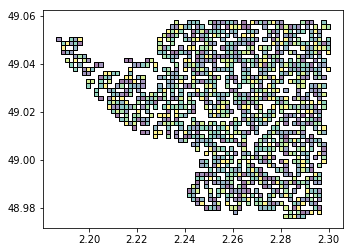

In [9]:
image_summary.plot()

That's a map of all of the images.  We're going to use it again soon, so let's save it.

In [10]:
output_file_name = 'vectors/image_summary.geojson'

# Make sure the file doesnt exist (the program will crash if it does)
if os.path.exists(output_file_name):
    os.remove(output_file_name)

# Save the file as a geojson
image_summary.to_file(output_file_name, driver='GeoJSON')